In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/banknotes.csv")
df.head()

,variace,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variace   1370 non-null   float64
 1   skewness  1370 non-null   float64
 2   curtosis  1370 non-null   float64
 3   entropy   1370 non-null   float64
 4   class     1370 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.6 KB


In [4]:
df["class"].value_counts()

class
0    761
1    609
Name: count, dtype: int64

/workspace/.pyenv_mirror/user/current/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


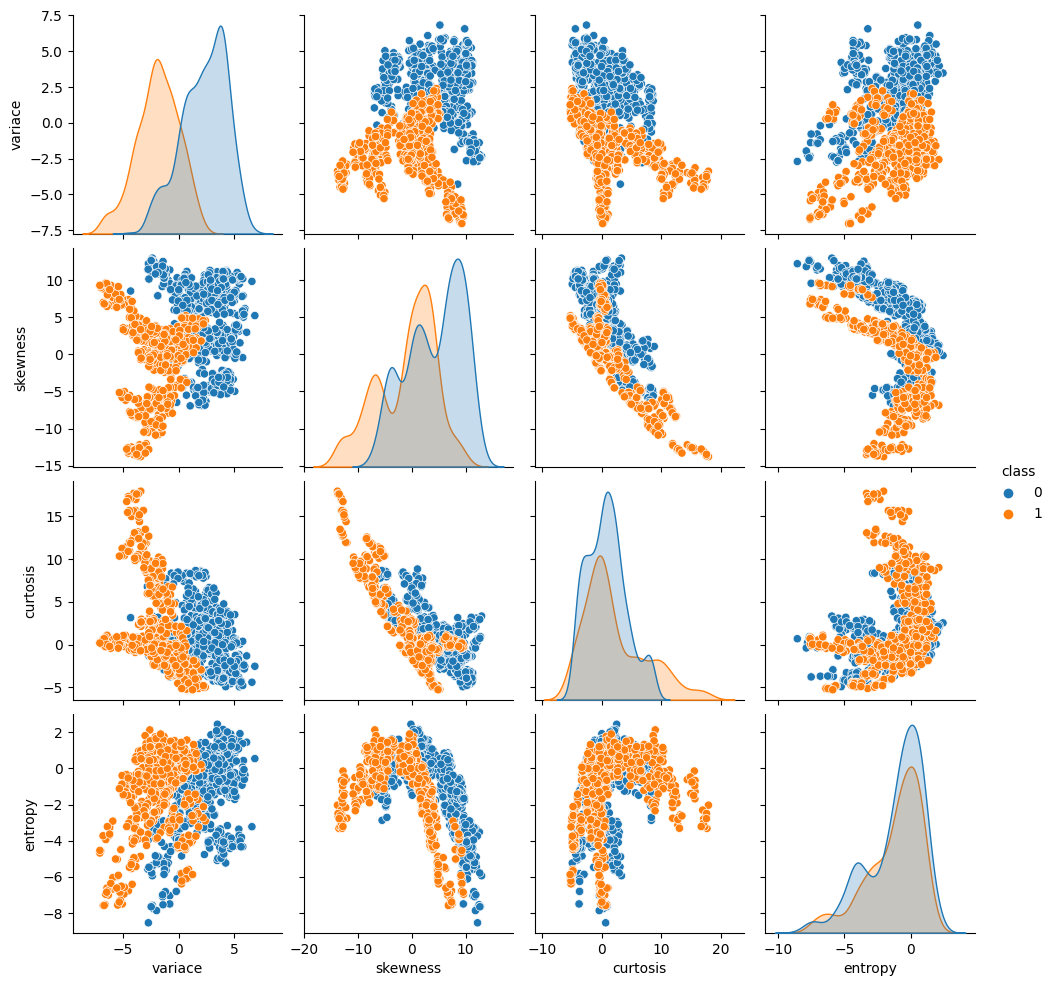

In [5]:
sns.pairplot(df,hue="class");

In [6]:
y = df["class"].values
X = df.drop("class",axis=1).values

In [7]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [9]:
X.shape

(1370, 4)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16,input_shape=(4,),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])
model.summary()

2023-07-21 10:36:54.129563: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 10:36:54.167285: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-21 10:36:54.168316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 10:36:55.231845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
35/35 [==============================] - 0s 1ms/step - loss: 0.7462 - accuracy: 0.4818
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5456
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.6314
Epoch 4/50
35/35 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.7327
Epoch 5/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5757 - accuracy: 0.7774
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5456 - accuracy: 0.7929
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.8002
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.8193
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8568
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.9024
Epoch 11/50
35/35 [

In [12]:
model.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.0495 - accuracy: 0.9964


[0.04949159547686577, 0.9963503479957581]

In [13]:
# 3.6216,8.6661,-2.8073,-0.44699,0
x_yeni = pd.DataFrame(data=[[3.6216,8.6661,-2.8073,-0.44699]])
round(model.predict(sc.transform(x_yeni))[0][0])

1/1 [==============================] - 0s 66ms/step


0

In [14]:
# -1.5322,-5.0966,6.6779,0.17498,1
x_yeni = pd.DataFrame(data=[[-1.5322,-5.0966,6.6779,0.17498]])
round(model.predict(sc.transform(x_yeni))[0][0])

1/1 [==============================] - 0s 18ms/step


1

In [15]:
y_preds = model.predict(X_test_scaled)

9/9 [==============================] - 0s 1ms/step


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pd.DataFrame(y_preds).apply(round).values)

array([[151,   1],
       [  0, 122]])

<Axes: >

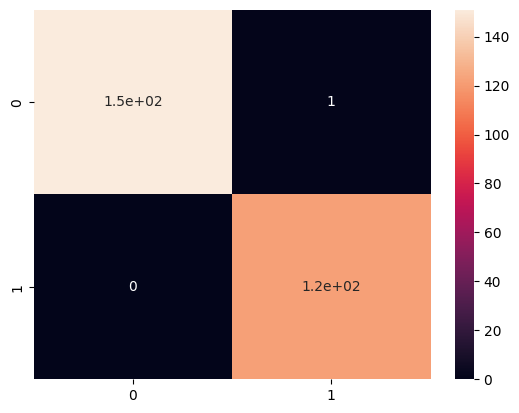

In [17]:
sns.heatmap(confusion_matrix(y_test,pd.DataFrame(y_preds).apply(round).values),annot=True)

In [18]:
y_preds = pd.DataFrame(y_preds).apply(round).values
from sklearn.metrics import  precision_score,recall_score
precision_score(y_test,y_preds),recall_score(y_test,y_preds)

(0.991869918699187, 1.0)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       122

    accuracy                           1.00       274
   macro avg       1.00      1.00      1.00       274
weighted avg       1.00      1.00      1.00       274

